# InstaBot Part - II

In [1]:
from selenium import webdriver                                                    #import web Driver 
from selenium.webdriver.support.ui import WebDriverWait                           #To use implcit and explicit wait
from selenium.webdriver.support import expected_conditions as EC                  #use in explicitly wait
from selenium.webdriver.common.by import By                                       #to select the attribute by Class,link_text
from selenium.common.exceptions import NoSuchElementException,TimeoutException    #import exceptions
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys                                   #provide keys in the keyboard like RETURN, F1, ALT
import time                                                                       #it is used in wait
import matplotlib.pyplot as plt                                                   #to plot the graph
import pandas as pd                                                               #for the dataframes and csv files
import numpy as np
from datetime import datetime, timedelta, date

In [2]:
driver = webdriver.Chrome(executable_path = 'chromedriver')                               #create a driver object for Chrome
wait = WebDriverWait(driver,15)                                                           #create Wait object for explicitly wait
driver.get('https://www.instagram.com/')                                                  #go to the instagram webpage
driver.maximize_window()                                                                  #maximize the browser window

def login(u,p):
    username = driver.find_element_by_name('username').send_keys(u)                       #find the username input and send the username
    password = driver.find_element_by_name('password')                                    #find the password input
    password.send_keys(p)                                                                 #send the password
    password.submit()                                                                     #press on the login button with type submit
    not_now = wait.until(EC.element_to_be_clickable(
        (By.XPATH,'//div[@class="piCib"]//div[@class="mt3GC"]//button[@class="aOOlW   HoLwm "]'))) #find not now button for turning notifications on
    not_now.click()                                                                       #press the not now button

username = 'prasansha___'
password = ''
login(username,password)                                                    #call the login function and pass the username and password as arguments
print('Log In Successful!')                                                               #print message after succesful

Log In Successful!


In [3]:
def search(q):
    time.sleep(2)
    search = driver.find_element_by_xpath('//input[@placeholder="Search"]')               #get the search bar input element
    query = q
    search.send_keys(query)                                                               #search for the query in the search box
    query_result = wait.until(EC.presence_of_all_elements_located(                        #wait for the search result list to load and get the account handle of the queries listed
                                       (By.XPATH, '//div[@class="fuqBx"]//a//span[@class="Ap253"]')))            
    for i in query_result:
        if i.get_attribute('innerHTML')==query:                                           #open account handle only if the account handle exactly matches the query
            i.click()                                                                     #click on the userhandle
            break                                                                         #once the correct handle matching to the query is found, break the loop
    else:                                                                                 #if the loop terminates normally, means without any matching user handles, clear the search box
        cross_btn = driver.find_element_by_class_name('coreSpriteSearchClear').click()    #clear the search bar
        print('Handle Not Found')                                                         #print a message if no matching handles are found
    
def go_to_home():
    time.sleep(3)
    home = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'s4Iyt')))                #find the instagram button to go to home page
    home.click()                                                                          #click on it

### Question 1
1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
    1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
    2. Now Find the number of posts these handles have done in the previous 3 days.
    3. Depict this information using a suitable graph.

In [4]:
def handles_from_keywords(keyword):
    search = driver.find_element_by_xpath('//input[@placeholder="Search"]')                       #get the search bar input element
    search.send_keys(keyword)                                                                     #search for keyword in the search bar
    list_searched = wait.until(EC.presence_of_all_elements_located(
                                   (By.XPATH, '//div[@class="fuqBx"]//a//span[@class="Ap253"]'))) #get the list displayed
    list_of_handles = []
    for i in list_searched:                                                                        
        if i.get_attribute('innerHTML')[0]!= '#' and ' ' not in i.get_attribute('innerHTML'):     #show the names of the keyword handles only and not the hashtags or loactions
            list_of_handles.append(i.get_attribute('innerHTML'))                                                   

    cross_btn = driver.find_element_by_class_name('coreSpriteSearchClear').click()                #clear the search bar
    
    return list_of_handles                                                                        #return the list of handles displayed as the results for the keyword



In [5]:
def number_of_followers(handle_list):                                                          #function returns a dictionary with keys as usernames and values as number of followers of that handle
    handles_and_followers = {}                                                                 #dictionary of handles and the corresponding number of followers
    for i in handle_list:
        time.sleep(2)
        search(i)                                                                              #search for the handles from the list received as parameter
        time.sleep(2)
        profile_followers = wait.until(EC.element_to_be_clickable((By.XPATH,'//section[@class="zwlfE"]//a[@class="-nal3 "]/span'))) #find the followers button
        total = int(''.join(profile_followers.get_attribute('title').split(',')))              #find the total number of followers of the user
        handles_and_followers[i] = total                                                       #assign username and number of followers as key value pair in the dictionary
    go_to_home()                                                                               #go to home page
    return handles_and_followers                                                               #return the created dictionary
    

In [10]:
def num_of_posts_in_past_days(handle_list,input_days):                                      #function returns a dictionary with usernames and the count of posts in certain days
    today = date.today()                                                                    #get today's date
    handles_and_posts = {}                                                                  #dictionary to store handles and keywords and number of posts in past three days as values
    for i in handle_list:
        count = 0                                                                           #initialise the count as zero
        search(i)                                                                           #search for the handle  
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click() #click on the first post
        while True:
            date_time = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_1o9PC Nzb55"]'))) #get the date-time tag
            y,m,d = map(int,(date_time.get_attribute('datetime').split('T')[0].split('-'))) #get the date-time attribute and convert it into the desired format and get the string format of the date of the post
            post_date = date(y,m,d)                                                         #change the date into date-format that is imported
            if (today-post_date).days <= input_days:                                        #if the difference in less than or equal to input_days
                count+=1                                                                    #count the post
                next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))) #get the web element of the next button
                next_btn.click()                                                            #click on the next button
            else:                                                                           #break the loop as soon as days start increasing from 3 as there will be no more posts from 3 days ago after that
                break
        handles_and_posts[i] = count                                                        #key value pair is username and count of posts in past input days
        cross = driver.find_element_by_xpath('//div[@class="                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
        cross.click()                                                                       #find the web element of the cross button and click it after the loop terminates
    go_to_home()
    return handles_and_posts                                                                #return the dictionary created

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [7]:
food_handles = handles_from_keywords('food')                                               #call the handles from keywords function
food_handles = food_handles[:10]                                                           #get the top 10 handles only
for i in food_handles:
    print(i)                                                                               #print the handle names

_foodology___
foodnetwork
foodgod
buzzfeedfood
kolkatafoodie
foodtalkindia
food
foodforthought_an
food_pari
yourfoodlab


In [8]:
handles_and_followers = number_of_followers(food_handles)                                  #call the number_of_followers function and get the dictionary of usernames and the followers
top_5_handles_and_followers = sorted(handles_and_followers.items(), key=lambda item: item[1], reverse = True)[:5] #get the top 5 most followed handles among the top 10
acc_list = []                                                                              #top 5 handles from the keyword food
for x,y in top_5_handles_and_followers:
    acc_list.append(x)
    print(x,'has',y,'followers')                                                           #print handles and corresponding followers

foodnetwork has 10300339 followers
buzzfeedfood has 3730115 followers
foodgod has 3592685 followers
yourfoodlab has 1276006 followers
foodtalkindia has 298153 followers


### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [11]:
top_5_acc_3_day_posts = num_of_posts_in_past_days(acc_list,3)                           #call the num_of_posts_in_past_days and get the dictionary and pass the handle list and number of days as 3 as arguments
for x,y in top_5_acc_3_day_posts.items():
    print(x,'has',y,'posts')                                                            #print the handle name and number of posts in past 3 days 

foodnetwork has 26 posts
buzzfeedfood has 0 posts
foodgod has 1 posts
yourfoodlab has 6 posts
foodtalkindia has 1 posts


### 1.3 Depict this information using a suitable graph.

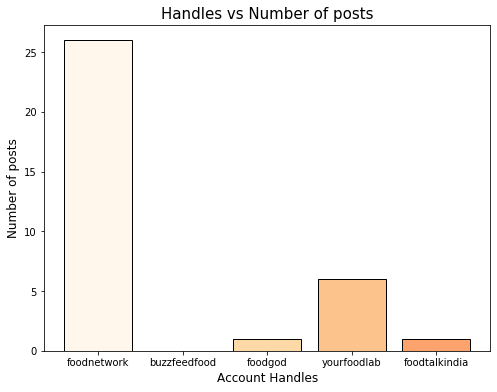

In [12]:
colors = plt.get_cmap('OrRd')(np.linspace(0, 1, 10))
plt.subplots(figsize=(8,6))                                                         #size of the graph
plt.bar([x for x,y in top_5_acc_3_day_posts.items()],[y for x,y in top_5_acc_3_day_posts.items()],color = colors,edgecolor = 'black') #bar graph
plt.xlabel('Account Handles',fontsize = 12)                                         #x label of the graph
plt.ylabel('Number of posts',fontsize = 12)                                         #y label of the graph
plt.title('Handles vs Number of posts',fontsize = 15)                               #title of the graph
plt.show()                                                                          #show the graph

### Question 2
1. Your friend also needs a list of hashtags that he should use in his posts.
    1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
    2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    3. Create a csv file with two columns : the word and its frequency
    4. Now, find the hashtags that were most popular among these bloggers
    5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [14]:
def get_content_of_posts(handles_list,num_of_posts_to_scrape):                              #function that returns dictionary of usernames and list of contents of certain numbers
    account_posts = {}                                                                      #dictionary will store usernames and contents of the posts
    for i in handles_list:
        search(i)                                                                           #search for the handle by calling the search function
        account_posts[i] = []

        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click() #click on the first post
        while True:
            try:                                                                            #check if the post has any caption for it
                content = wait.until(EC.presence_of_element_located((By.XPATH,'//li[@class="gElp9 rUo9f PpGvg "]//div[@class="C4VMK"]/span'))) #get the caption content of the post
                account_posts[i].append(content.text)                                       #get the text in the content and append it in the list of contents of a specific user handle
            except TimeoutException:                                                        #if there is no caption
                pass                                                                        #pass and do nothing
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))) #get the web element of the next button
            next_btn.click()                                                                #click on the next button
            if len(account_posts[i]) == num_of_posts_to_scrape:                             #if ten posts are retrieved break the loop
                break                                                                       #check for 10 posts is neccesary as post without any caption is not counted but total 10 posts are needed

        cross = driver.find_element_by_xpath('//div[@class="                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
        cross.click()                                                                       #press the cross button and close the post dialog
    go_to_home()                                                                            #return to home page by calling the go to home function
    return account_posts


### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [15]:
top_5_account_posts = get_content_of_posts(acc_list,10)                                 #call the get_content_of_posts and pass the top5 handles and 10 as the number of posts to scrape contents
for x,y in top_5_account_posts.items():                                                 #for usernames and content in the dictionary
    print('\t\t\t\t',x,'\n')                                                            #print username
    for i in range(len(y)):
        print('----- POST',i+1,':',y[i],'\n')                                           #print content of each of the top 10 posts
    print('\n\n\n')

				 foodnetwork 

----- POST 1 : What if we told you you could enjoy s'mores from the comfort of your home? @justataste shows you how to make this toasty berry-flavored riff on the classic (AND a s'mores dip!) in her Indoor S'mores 2 Ways class on the @FoodNetworkKitchen app. Click the link in our bio to watch today! 

----- POST 2 : Blackberry Hand Pies (with @kardeabrown)

Raise your hand if want more than one of these adorable fruit pies! 🥧

#DeliciousMissBrown > Sunday at 12|11c

Save the recipe on the @FoodNetworkKitchen app. 

----- POST 3 : Recipe of the Day: Peach-Plum Galette 🍑Click the link in our bio to save the recipe on your @foodnetworkkitchen app! 

----- POST 4 : @GiadaDeLaurentiis' Homemade Tiny Gnocchi 😍

Learn how Giada makes a special type of Sardinian gnocchi. They're light, fluffy and perfect with a simple shrimp sauce! 🍤🍤

#GiadaAtHome > Saturdays @ 12|11c

Save the recipe on the @FoodNetworkKitchen app. 

----- POST 5 : Class of the Day: Vegan Almond Macaroons 

### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [16]:
hashtags = []                                                                 #store hashtags used
for x,y in top_5_account_posts.items():
    for post in y:                                                            #for every caption of the top 10 posts
        data = post.split()                                                   #split the text of the caption
        for word in data:
            if '#' in word:                                                   #if hashtag in the word
                hashtags.append(word[word.index('#'):])                       #append the word to the hashtags list
for i in hashtags:                                                            #print the list of hashtags
    print(i)

#DeliciousMissBrown
#GiadaAtHome
#VivsTips
#bringme
#portlandtravel
#sushirestuarant
#sushi
#oregontravel
#sustainability
#NoshMatespartner
#Costco
#CelebritySlotsPartner
#CelebritySlots
#🎰📲
#recipeoftheday
#recipes
#eggs
#egglover
#foodstagram
#foodaholic
#foodgasm
#mumbaistreetfood
#yummyinmytummy
#recipe
#foodie
#comfortfood
#indinacuisine
#streetfood
#recipe
#foodie
#indinacuisine
#streetfood
#foodporn
#soup
#recipeoftheday
#souprecipe
#foodie
#indinacuisine
#foodstagram
#foodiesofinstagram
#foodforfoodies
#foodaholic
#foody
#photography
#canonphotography
#recipe
#foodie
#malai
#indinacuisine
#streetfood
#comfortfood
#recipe
#foodie
#indiancuisine
#comfortfoor
#sanjyotkeer
#recipe
#tava
#foodie
#foodporn
#foodphotography
#food
#rice
#noodles
#monsoon
#mumbaifoodie
#mumbairains
#comfortfood
#indiancuisine
#streetfood
#foodie
#indochinese
#recipes
#sanjyotkeer
#recipes
#recipeoftheday
#foodporn
#manchowsoup
#monsoons
#foodiesofinstagram
#foodaholic
#sanjyotkeer
#mumbaistreetfood
#Hap

In [17]:
from collections import Counter                                               #for counting the frequency
hashtag_freq = Counter(hashtags)                                              #call Counter to get the word and corresponding frequency
for x in hashtag_freq:
    print(x,hashtag_freq[x])                                                  #print word and corresponding frequency

#DeliciousMissBrown 1
#GiadaAtHome 1
#VivsTips 1
#bringme 1
#portlandtravel 1
#sushirestuarant 1
#sushi 1
#oregontravel 1
#sustainability 1
#NoshMatespartner 1
#Costco 1
#CelebritySlotsPartner 1
#CelebritySlots 1
#🎰📲 1
#recipeoftheday 3
#recipes 3
#eggs 1
#egglover 1
#foodstagram 2
#foodaholic 3
#foodgasm 1
#mumbaistreetfood 2
#yummyinmytummy 1
#recipe 5
#foodie 7
#comfortfood 3
#indinacuisine 4
#streetfood 4
#foodporn 3
#soup 1
#souprecipe 1
#foodiesofinstagram 2
#foodforfoodies 1
#foody 1
#photography 1
#canonphotography 1
#malai 1
#indiancuisine 2
#comfortfoor 1
#sanjyotkeer 3
#tava 1
#foodphotography 1
#food 1
#rice 1
#noodles 1
#monsoon 1
#mumbaifoodie 1
#mumbairains 1
#indochinese 1
#manchowsoup 1
#monsoons 1
#HappyMacnCheeseDay 1
#MacnCheeseDay 1
#EasyRecipe 1
#macandcheese 1
#worldfrenchfryday 1
#frenchfries 1
#SaturdayMood 1
#WeekendVibes 1
#TalkHealth 1
#fitnessmotivation 1
#wednesdayworkout 1


### 2.3 Create a csv file with two columns : the word and its frequency

In [18]:
word = []                                                                                     #word list
freq = []                                                                                     #frequency list
for x in hashtag_freq:
    word.append(x)                                                                            #append words
    freq.append(hashtag_freq[x])                                                              #append frequency
dataset = pd.DataFrame({'Word':word,'Frequency':freq})                                        #make a dataframe of the words and frequencies
dataset.to_csv('frequency.csv',index=False)                                                   #make a csv file
dataset                                                                                       #print the dataset made

,Word,Frequency
0,#DeliciousMissBrown,1
1,#GiadaAtHome,1
2,#VivsTips,1
3,#bringme,1
4,#portlandtravel,1
...,...,...
57,#SaturdayMood,1
58,#WeekendVibes,1
59,#TalkHealth,1
60,#fitnessmotivation,1


### 2.4 Now, find the hashtags that were most popular among these bloggers

In [19]:
top_5_words = dataset.loc[dataset['Frequency'].sort_values(ascending = False).index].head(5)['Word']           #get 5 most used hashtags
top_5_words_freq = dataset.loc[dataset['Frequency'].sort_values(ascending = False).index].head(5)['Frequency'] #get frequency of top 5 most used hashtags
for i in top_5_words:
    print(i)                                                                                                   #print the top 5 most used hashtags

#foodie
#recipe
#streetfood
#indinacuisine
#recipeoftheday


### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

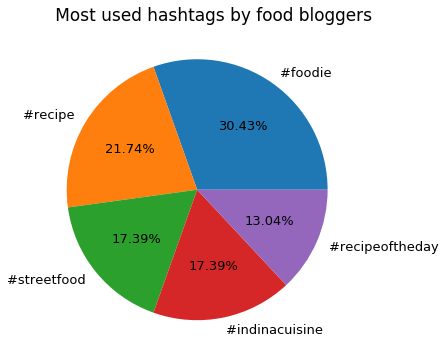

In [20]:
plt.subplots(figsize=(6,6))                                                                    #size of the graph
plt.pie(top_5_words_freq,labels = top_5_words,autopct = '%.2f%%',textprops={'fontsize':13})    #pie graph
plt.title('      Most used hashtags by food bloggers',fontsize = 17)                           #title of the graph
plt.show()                                                                                     #show the graph

### Question 3
1. You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
    1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
    2. Calculate the average likes for a handle.
    3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
    4. Create a bar graph to depict the above obtained information.

In [35]:
def likes_of_posts(handle_list,num_of_posts):                                               #function that returns a dictionary of usernames and likes on given number of posts
    acc_posts_likes = {}                                                                    #dictionary stores likes on top 10 posts of top 5 handles
    for i in handle_list:
        search(i)                                                                           #search for the handle
        acc_posts_likes[i] = []
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click() #click on first post
        for j in range(num_of_posts):
            time.sleep(1)
            likes_section = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class="EDfFK ygqzn"]'))) #get the likes section
            try:                                                                            #check whether the post is a video or not as the tags inside the like section differ accordingly
                non_video = likes_section.find_element_by_xpath('.//div[@class="Nm9Fw"]')   #get the tag for the enclosing div of the likes
                a_tag = non_video.find_elements_by_xpath('.//a')                            #check if there are names in the likes e.g. liked by some_username and 150 others
                likes = int(non_video.find_element_by_xpath('.//button/span').text.replace(',','')) #get the number of likes by replacing the commas with empty string
                if a_tag:
                    likes+=len(a_tag)                                                       #add the number of names in the likes part to the number of likes obtained
            except NoSuchElementException:                                                  #exception when the post is a video and the tags are different
                video = likes_section.find_element_by_xpath('.//span[@class="vcOH2"]')      #get the tag with likes
                video.click()                                                               #click on the views that opens up a small box that shows the number of likes on that post
                time.sleep(1)
                likes = int(video.find_element_by_xpath('//div[@class="vJRqr"]/span').text.replace(',','')) #get the number of likes from that box
                close_likes = driver.find_element_by_tag_name('body')                       #close that likes box that opens up by clicking anywhere on the page
                close_likes.click()
            acc_posts_likes[i].append(('post '+str(j+1), likes))                            #append post number and number of likes as a tuple
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))) #get the web element of the next button
            next_btn.click()                                                                #click on the next button
        cross = driver.find_element_by_xpath('//div[@class="                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
        cross.click()                                                                       #find the web element of the cross button and click it after the loop terminates
    go_to_home()                                                                            #call the go_to_home function and return to the home page
    return acc_posts_likes

### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [37]:
top_5_acc_posts_likes = likes_of_posts(acc_list,10)                                    #call the likes_of_posts function and pass the 5 handles as list and 10 as the number of posts whose likes have to be fetched
for x,y in top_5_acc_posts_likes.items():                                              #for the items in the dictionary having usernames as keys and num of posts with likes as values
    print(x,y)                                                                         #print username and likes list with post number
    print()

foodnetwork [('post 1', 962), ('post 2', 16892), ('post 3', 7206), ('post 4', 25761), ('post 5', 9021), ('post 6', 49304), ('post 7', 19141), ('post 8', 10492), ('post 9', 7247), ('post 10', 25186)]

buzzfeedfood [('post 1', 5811), ('post 2', 3948), ('post 3', 5340), ('post 4', 12841), ('post 5', 6211), ('post 6', 4110), ('post 7', 7073), ('post 8', 3096), ('post 9', 5341), ('post 10', 8054)]

foodgod [('post 1', 15886), ('post 2', 33599), ('post 3', 8335), ('post 4', 11097), ('post 5', 22684), ('post 6', 36719), ('post 7', 5917), ('post 8', 22302), ('post 9', 40680), ('post 10', 8001)]

yourfoodlab [('post 1', 9153), ('post 2', 5172), ('post 3', 9813), ('post 4', 17713), ('post 5', 12915), ('post 6', 32856), ('post 7', 40020), ('post 8', 26672), ('post 9', 34608), ('post 10', 29221)]

foodtalkindia [('post 1', 363), ('post 2', 2455), ('post 3', 974), ('post 4', 709), ('post 5', 1033), ('post 6', 257), ('post 7', 808), ('post 8', 135), ('post 9', 648), ('post 10', 767)]



### 3.2 Calculate the average likes for a handle

In [38]:
avg_likes_of_handles = {}                                                #dictionary stores the usernames and average likes on top 10 posts
for x,y in top_5_acc_posts_likes.items():
    avg_likes_of_handles[x] = 0
    s = 0                                                                #initialise the count variable
    for i,j in y:
        s+=j                                                             #add the number of likes of top 10 posts for ceratin username
    avg_likes_of_handles[x] = s/10                                       #get the average and store it as value for the username key
for x,y in avg_likes_of_handles.items():
    print(x,y)                                                           #print usernames and average likes on top 10 posts

foodnetwork 17121.2
buzzfeedfood 6182.5
foodgod 20522.0
yourfoodlab 21814.3
foodtalkindia 814.9


### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [39]:
followers = [y for x,y in top_5_handles_and_followers]                              #get the number of followers of the top 5 handles
like_follower_ratio = []
for i in range(len(avg_likes_of_handles)):
    print(followers[i]/list(avg_likes_of_handles.values())[i])                      #get the ratio of likes to followers
    like_follower_ratio.append(followers[i]/list(avg_likes_of_handles.values())[i]) #append the ratio to a list

601.6131462747938
603.3344116457744
175.06505213916773
58.494015393572106
365.87679469873603


### 3.4 Create a bar graph to depict the above obtained information.

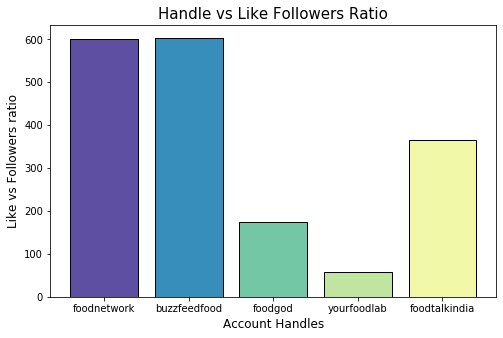

In [40]:
colors = plt.get_cmap('Spectral_r')(np.linspace(0, 1, 10))
plt.subplots(figsize=(8,5))                                                                         #size of the graph
bar = plt.bar(list(avg_likes_of_handles.keys()),like_follower_ratio,color = colors,edgecolor = 'black') #bar graph
plt.xlabel('Account Handles',fontsize = 12)                                                         #x label
plt.ylabel('Like vs Followers ratio',fontsize = 12)                                                 #y label
plt.title('Handle vs Like Followers Ratio',fontsize = 15)                                           #title of the graph
plt.show()                                                                                          #show the graph

In [41]:
driver.quit()                                                                       #close the web browser window